<a href="https://colab.research.google.com/github/Jyo172/twitter_sentiment_analysis_updated/blob/master/Copy_of_Emotion_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mount google drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_path = "drive/My Drive/data/train.csv"
test_path = "drive/My Drive/data/test.csv"

# **Exploratory Data Analysis & Data Pre Processing**


## **Importing necessary libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Data Modelling Libraries

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier 


from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import unicodedata
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string 
from nltk.stem import WordNetLemmatizer
import re

from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Task - 1 : Load and Prepare dataset

In [0]:
def read_data(filepath):
    df = pd.read_csv(filepath, encoding = 'UTF-8')
    return df

train_data = read_data(train_path)
test_data  = read_data(test_path)
print("train.shape: {} \ntest.shape: {}".format(train_data.shape, test_data.shape))

FileNotFoundError: ignored

In [0]:
train = train_data
test  = test_data

print("Null-test",test.isnull().sum().sum())
print("Null-train",train.isnull().sum().sum())

NameError: ignored

In [0]:
train.dropna(inplace=True)

In [0]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [0]:
test.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7273 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7273 non-null int64
tweet        7273 non-null object
sentiment    7273 non-null int64
dtypes: int64(2), object(1)
memory usage: 227.3+ KB


In [0]:
train.drop(['tweet_id'],axis=1, inplace=True)
test.drop(['tweet_id'],axis=1, inplace=True)

In [0]:
train[train['sentiment']==0].sample(2)

,tweet,sentiment
2125,Barry Diller says iPad-only magazines like The...,0
2259,Getting ready for &quot;iPad design headaches&...,0


In [0]:
train[train['sentiment']==1].sample(2)

,tweet,sentiment
1726,ÛÏ@mention Have yet to see someone with a PC ...,1
518,Soundtrckr featured by @mention @mention as a ...,1


In [0]:
train[train['sentiment']==2].sample(2)

,tweet,sentiment
5018,RT @mention These iPhone apps will keep you gr...,2
3378,@mention #SXSW don't forget @mention to plan y...,2


In [0]:
train[train['sentiment']==3].sample(2)

,tweet,sentiment
2386,#SocialNetworks: #Google noch heute mit #Circl...,3
6631,Reports of @mention introducing a new social m...,3


## **Check for Class Imbalance**

Counter({1: 4310, 2: 2382, 0: 456, 3: 125})


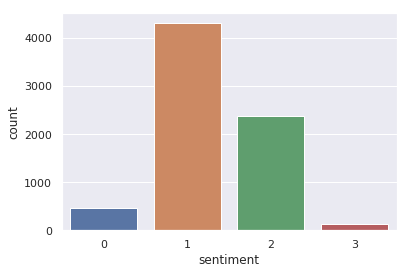

In [0]:
import collections
sentiment_counter = collections.Counter(train['sentiment'])
print(sentiment_counter)

sns.set(style="darkgrid")
ax = sns.countplot(x="sentiment", data=train)

# **Data Visualization**

wordcloud for sentiments  0


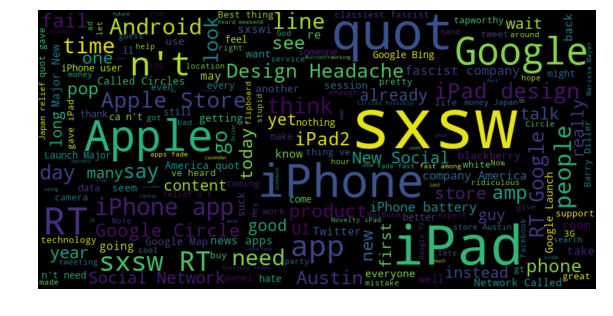

wordcloud for sentiments  1


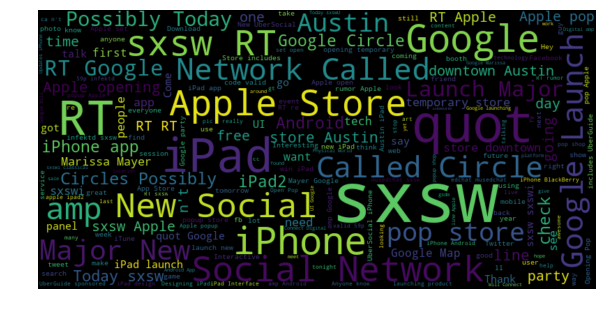

wordcloud for sentiments  2


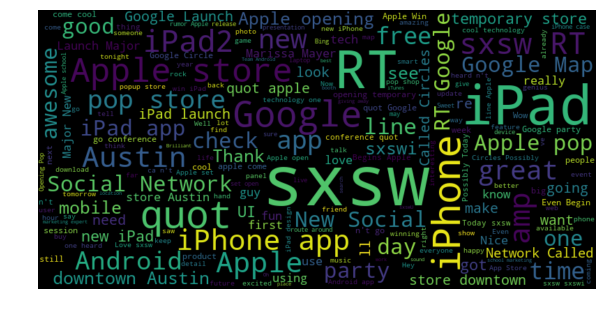

wordcloud for sentiments  3


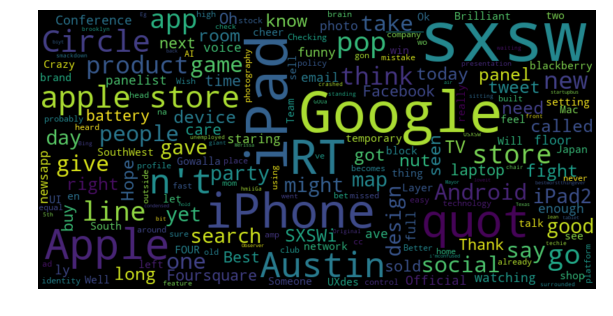

In [0]:
def create_wordcloud(sentiments):
  wordcloud = WordCloud(background_color='black',
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)
  
  for i in range(len(sentiments)):
    print("wordcloud for sentiments ", i)
    wordcloud.generate(sentiments[i])
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

sentiment_negative = ' '.join([text for text in train_tweet.loc[train_tweet['sentiment'] == 0, 'tweet']])
sentiment_neutral  = ' '.join([text for text in train_tweet.loc[train_tweet['sentiment'] == 1, 'tweet']])
sentiment_positive = ' '.join([text for text in train_tweet.loc[train_tweet['sentiment'] == 2, 'tweet']])
sentiment_unknown  = ' '.join([text for text in train_tweet.loc[train_tweet['sentiment'] == 3, 'tweet']])

sentiments = [sentiment_negative, sentiment_neutral, sentiment_positive, sentiment_unknown]

create_wordcloud(sentiments)

## **Preprocess Data**

In [0]:
stop_words = list(set(stopwords.words('english')))
custom_stop  = ['rt','link','mention','video','cont','in','get','via','SXSW']
stop_words.extend(custom_stop)

punctuation = list(string.punctuation)
custom_punct = ['"#$%&\'()*+,-./:;<=>@[\\]^_`{|}~∞θ÷α•β∅³π‘₹´°£€\×™√²—!?']
punctuation.extend(custom_punct)

def feature_engineering(dataframe):
  df = dataframe
  
  # number of punctuations
  df['num_punc'] = df['tweet'].apply(lambda tweet_msg: len([punct for punct in tweet_msg if punct in punctuation]))

  # Finding the number of words in the headline
  df['num_words'] = df['tweet'].apply(lambda tweet_msg: len(tweet_msg.split()))

  # the unique number of words in the headline
  df['num_unique_words'] = df['tweet'].apply(lambda tweet_msg: len(set(tweet_msg.split())))

  # the number of characters in the headline
  df['num_chars'] = df['tweet'].apply(lambda tweet_msg: len(tweet_msg))

  # number of genuine words with no stopwords  
  df['num_words_nostop'] = df['tweet'].apply(lambda tweet_msg: len([word for word in tweet_msg.split() if word not in stop_words]))

  # number of stopwords
  df['num_stop'] = df['num_words'] - df['num_words_nostop']
  
  return df

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  
  
def preprocess(dataframe, cols_list):
  for col in cols_list:
    dataframe[col] = dataframe[col].apply(lambda row:remove_pattern(str(row),pattern="@[\w]*"))
    dataframe[col] = dataframe[col].apply(lambda row: nltk.word_tokenize(row))
    dataframe[col] = dataframe[col].apply(lambda row: [word for word in row if word not in stop_words])
    dataframe[col] = dataframe[col].apply(lambda row: [word for word in row if word not in punctuation])
    
    lemmatizer = WordNetLemmatizer()
    dataframe[col] = dataframe[col].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
    dataframe[col] = dataframe[col].apply(lambda x: ' '.join(x))
    dataframe[col] = dataframe[col].apply(lambda x:unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

  return dataframe

In [0]:
train_fe = feature_engineering(train)
test_fe  = feature_engineering(test)

train_tweet = preprocess(train_fe, ['tweet']) 
test_tweet  = preprocess(test_fe, ['tweet']) 

In [0]:
print("Preprocessed Dataframe" )
train.head()

Preprocessed Dataframe


,tweet,sentiment,num_punc,num_words,num_unique_words,num_chars,num_words_nostop,num_stop
0,sxswnui sxsw apple defining language touch dif...,1,3,12,12,89,10,2
1,Learning ab Google doodle All doodle light fun...,1,8,19,19,143,15,4
2,one in-your-face ex stealing show yr RT quot A...,2,12,22,19,132,15,7
3,This iPhone app would b pretty awesome n't cra...,0,5,19,19,125,15,4
4,Line outside Apple store Austin waiting new iPad,1,3,14,13,77,10,4


# **Baseline Model and Feature Engineering**

## **Applying a baseline model**

In [0]:
def xy_separator(df):
  X = df['tweet']
  y = df['sentiment']
  return X,y

X_train, y_train = xy_separator(train_tweet)

In [0]:
def run_model(dataframe,
              target,
              vectorizer=TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=0.02),
              model=OneVsRestClassifier(MultinomialNB())
             ):
    '''
    Performs model training and validate using f1-score
    '''
    X = dataframe
    y = target
    vect = vectorizer
    
    # splitting data into training and validation set
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.3)
    
    # Vectorize
    vector = vect.fit(X_train)
    X_train_vect = vector.transform(X_train).toarray()
    X_valid_vect = vector.transform(X_valid).toarray()
    
    # Fit and predict
    model.fit(X_train_vect, y_train)  
    y_pred = model.predict(X_valid_vect)  
    
    #validation using f1-score
    c_report = metrics.classification_report(y_valid, y_pred)
    print('classification report: \n', c_report)
    F1_score = f1_score(y_valid, y_pred,average=None)
    print('F1_score: ',F1_score) 
    
    return F1_score, y_pred

In [0]:
X = X_train
y = y_train

models = [MultinomialNB, GaussianNB,LogisticRegression,DecisionTreeClassifier, RandomForestClassifier]
vectorizers = [TfidfVectorizer, CountVectorizer]
for vectorizer in vectorizers:
  vectorizer = vectorizer(max_df=0.9, min_df=0.02)
  for model in models:
      # run model
      model = model()
      F1_score, y_pred = run_model(X, y, vectorizer = vectorizer, model = OneVsRestClassifier(model)) 
      print('On Model - \n'+str(model),'\nwith Vectorizer - \n'+str(vectorizer))
      print('===='*20)

classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.61      0.94      0.74      1291
           2       0.54      0.15      0.23       724
           3       0.00      0.00      0.00        30

    accuracy                           0.61      2182
   macro avg       0.29      0.27      0.24      2182
weighted avg       0.54      0.61      0.52      2182

F1_score:  [0.         0.74268293 0.22900763 0.        ]
On Model - 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
with Vectorizer - 
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=0.02, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf

#  Handeling Data Imbalance with Grid-Search & Hyperparameter Tuning 

## **1. Grid Search using Logistic Regression**

In [0]:
def grid_search_log_reg(dataframe,target):
    X = dataframe
    y = target
    tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=0.01)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # TF-IDF feature matrix
    tfidf_vector = tfidf_vectorizer.fit(X_train)
    X_train_vect = tfidf_vector.transform(X_train).toarray()
    X_valid_vect = tfidf_vector.transform(X_valid).toarray()
    print("X_train_vect shape befor smote: ",X_train_vect.shape)
    
    # SMOTE to handle data imbalance
    smote = SMOTE(kind='regular')
    X_train_vect_sm, y_train_sm =  smote.fit_sample(X_train_vect, y_train)
    print("X_train_vect_sm shape after smote: ",X_train_vect_sm.shape)
    
    log_reg = LogisticRegression()
    
    param_grid = { 
                  'C' : np.logspace(-5, 8, 15)
                 }
    grid_search_model = GridSearchCV(log_reg, param_grid=param_grid)
    
    grid_search_model.fit(X_train_vect_sm, y_train_sm)
    y_pred = grid_search_model.predict(X_valid_vect) 
    
    #validation using f1-score
    c_report = metrics.classification_report(y_valid, y_pred)
    print('classification report: \n', c_report)
    F1_score = f1_score(y_valid, y_pred,average=None)
    print('F1_score: ',F1_score) 
    
    return grid_search_model.best_params_

X = X_train
y = y_train

grid_search_log_reg(X,y)

X_train_vect shape befor smote:  (5091, 149)
X_train_vect_sm shape after smote:  (12036, 149)
classification report: 
               precision    recall  f1-score   support

           0       0.11      0.32      0.16       138
           1       0.74      0.47      0.57      1301
           2       0.47      0.41      0.44       706
           3       0.02      0.22      0.04        37

    accuracy                           0.43      2182
   macro avg       0.34      0.35      0.30      2182
weighted avg       0.60      0.43      0.49      2182

F1_score:  [0.16146789 0.57277438 0.43630816 0.04155844]


{'C': 1389495.494373136}

## **2. Grid Search on Random Forest model**

In [0]:
def grid_search_rf_clf(dataframe,target):
    X = dataframe
    y = target
    
    tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=0.01, max_features=1000)

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # TF-IDF feature matrix
    tfidf_vector = tfidf_vectorizer.fit(X_train)
    X_train_vect = tfidf_vector.transform(X_train).toarray()
    X_valid_vect = tfidf_vector.transform(X_valid).toarray()
    
    rf_clf = RandomForestClassifier()
    param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rf_clf, param_grid=param_grid)
    
    grid_search_model.fit(X_train, y_train)
    prediction = grid_search_model.predict(X_valid) 
    prediction_int = prediction[:,1] >= 0.3 
    prediction_int = prediction_int.astype(np.int)
    
    #validation using f1-score
    c_report = metrics.classification_report(y_valid, prediction_int)
    print('classification report: \n', c_report)
    F1_score = f1_score(y_valid, prediction_int,average=None)
    print('F1_score: ',F1_score) 
    
    return grid_search_model.best_params_

X = train_pr['tweet']
y = train_pr['sentiment']

grid_search_rf_clf(X,y)

# **Ensembling**

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


def ensemble(dataframe,target):
    X = dataframe
    y = target
    
    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

    model1 = RandomForestClassifier()
    
    model2 = LogisticRegression()
    
    model = VotingClassifier(estimators=[('rf', model1), ('lr', model2)], voting='soft')
    model.fit(X_train,y_train)
    grid_search_model.fit(X_train, y_train)
    prediction = model.predict_proba(X_valid) 
    prediction_int = prediction[:,1] >= 0.3 
    prediction_int = prediction_int.astype(np.int)
    
    #validation using f1-score
    c_report = metrics.classification_report(y_valid, prediction_int)
    print('classification report: \n', c_report)
    F1_score = f1_score(y_valid, prediction_int,average=None)
    print('F1_score: ',F1_score) 
    
    return None
    
ensemble(bank_df,y)

# **Final Submission**

In [0]:
X_train = train_pr['tweet']
y_train = train_pr['sentiment']
X_test = test_pr['tweet']

vect = CountVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2)
# Vectorize
X_train_cv = vect.fit_transform(X_train)
X_train_cv = X_train_cv.toarray()
X_test_cv = vect.transform(X_test)
X_test_cv = X_test_cv.toarray()

# Fit and predict
final_model = MultinomialNB()

final_model.fit(X_train_cv, y_train)  
prediction = final_model.predict_proba(X_test_cv) 
prediction_int = prediction[:,1] >= 0.3 
predictions = prediction_int.astype(np.int)

In [0]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'tweet_id':test['tweet_id'],'Sentiment':predictions})

submission.to_csv('submission.csv', index=False)
files.download('submission.csv')